# Data Gathering - Poll data

In [40]:
import gepd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [7]:
data = gepd.gepd()

In [8]:
df = data.get_surveys()

In [9]:
df

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,1,2,4,3,7,5,0,101,8,102,11,13,10,14,9,6,16,15
0,2021-08-26,1919,0,3,64,2021-08-18,2021-08-24,23.0,23.0,18.0,12.0,11.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-26,1153,8,1,95,2021-08-19,2021-08-24,NaN,36.0,6.0,8.0,17.0,11.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-25,1050,3,24,97,2021-08-23,2021-08-24,NaN,24.5,15.5,9.5,11.0,15.0,9.5,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-25,1096,0,7,41,2021-08-12,2021-08-18,23.0,21.0,17.0,13.0,12.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-25,1160,3,1,16,2021-08-18,2021-08-21,NaN,23.0,17.0,8.0,11.0,12.0,10.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,2017-01-25,2504,0,2,2,2017-01-16,2017-01-20,37.0,21.0,10.0,6.0,12.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,2017-01-24,5028,0,16,14,2017-01-12,2017-01-23,37.1,20.4,9.3,6.2,13.2,9.5,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,2017-01-24,1992,0,5,4,2017-01-20,2017-01-23,32.5,21.0,8.5,7.5,14.5,11.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,2017-01-22,2805,0,3,3,2017-01-12,2017-01-18,36.0,21.0,9.0,6.0,12.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transforming collum names

In [10]:
parties_dict = data.get_parties()

In [11]:
def parties_dict_short_function(parties_dict):
    dct = {}
    for key, value in parties_dict.items():
        dct[key] = value["Shortcut"]
    return dct

In [12]:
parties_dict_short  = parties_dict_short_function(parties_dict)


In [13]:
parties_dict_short

{'7': 'AfD',
 '11': 'BP',
 '14': 'BVB/FW',
 '4': 'Grüne',
 '16': 'BIW',
 '1': 'CDU/CSU',
 '101': 'CDU',
 '102': 'CSU',
 '5': 'Linke',
 '13': 'Die PARTEI',
 '3': 'FDP',
 '8': 'Freie Wähler',
 '9': 'NPD',
 '15': 'Tierschutzpartei',
 '6': 'Piraten',
 '2': 'SPD',
 '10': 'SSW',
 '0': 'Sonstige'}

In [14]:
df = df.rename(columns=parties_dict_short)

## Date to 120 days

In [15]:
df["Date"] =  pd.to_datetime(df["Date"], format= "Y-M-D")

In [16]:
start_date = "2021-05-24"
end_date = "2021-8-26"

In [17]:
df_dated = df.loc[(df['Date'] > start_date) & (df['Date'] <= end_date)]

## Eliminating useless collumns

In [18]:
df_dated = df_dated.fillna(0)

In [19]:
df_dated["CDU/CSU"] = df_dated["CDU/CSU"] + df_dated["CDU"] + df_dated["CSU"]

In [20]:
other_parties = ["Sonstige", "Freie Wähler", "BP","Die PARTEI", "SSW", "BVB/FW", "NPD", "Piraten",\
                    "BIW", "Tierschutzpartei"]

In [21]:
df_dated = df_dated.drop(columns = ["CDU", "CSU"])

In [22]:
df_dated["other"] =  df_dated[other_parties].sum(axis=1)

In [23]:
df_dated

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,CDU/CSU,SPD,Grüne,FDP,AfD,Linke,Sonstige,Freie Wähler,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei,other
0,2021-08-26,1919,0,3,64,2021-08-18,2021-08-24,23.0,23.0,18.0,12.0,11.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,2021-08-26,1153,8,1,95,2021-08-19,2021-08-24,15.0,36.0,6.0,8.0,17.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,2021-08-25,1050,3,24,97,2021-08-23,2021-08-24,15.0,24.5,15.5,9.5,11.0,15.0,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5
3,2021-08-25,1096,0,7,41,2021-08-12,2021-08-18,23.0,21.0,17.0,13.0,12.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,2021-08-25,1160,3,1,16,2021-08-18,2021-08-21,19.0,23.0,17.0,8.0,11.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-05-26,10016,0,16,14,2021-05-19,2021-05-25,27.0,16.0,23.0,13.0,10.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
121,2021-05-26,1000,14,5,4,2021-05-17,2021-05-23,25.0,10.0,11.0,8.0,26.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
122,2021-05-26,2004,0,2,63,2021-05-18,2021-05-21,24.0,14.0,25.0,13.0,10.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
123,2021-05-26,2128,0,5,4,2021-05-21,2021-05-25,26.0,16.0,22.0,12.5,11.5,6.5,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5


In [24]:
df_dated = df_dated.drop( columns = other_parties ).drop( columns = ["Parliament_ID","Institute_ID", "Tasker_ID"] )


### Removing repeated dates with mean

In [25]:
df_dated_grouped = df_dated.groupby(by = "Date").mean()

In [26]:
pd.date_range(start = start_date, end = end_date ).difference(df_dated.Date).value_counts().sum()

25

In [27]:
## we have 37 missing values

### Adding missing dates

In [28]:
correct_dates = pd.DataFrame(pd.date_range(start = start_date, end = end_date ))

In [29]:
correct_dates

,0
0,2021-05-24
1,2021-05-25
2,2021-05-26
3,2021-05-27
4,2021-05-28
...,...
90,2021-08-22
91,2021-08-23
92,2021-08-24
93,2021-08-25


In [30]:
df_dated = correct_dates.merge(df_dated_grouped, how = "left", left_on= 0 , right_on = ["Date" ])

In [31]:
df_dated = df_dated.set_index([0])

In [32]:
df_dated = df_dated.where(df_dated.notnull() , other=(df_dated.fillna(method='ffill')\
                                                           + df_dated.fillna(method='bfill'))/2)


In [33]:
df_dated.isna().value_counts()

Surveyed_Persons  CDU/CSU  SPD    Grüne  FDP    AfD    Linke  other
False             False    False  False  False  False  False  False    94
True              True     True   True   True   True   True   True      1
dtype: int64

### Removing first two and last two values

In [34]:
df_final =  df_dated.iloc[2:-2].round(2)


In [41]:
df_final

,Surveyed_Persons,CDU/CSU,SPD,Grüne,FDP,AfD,Linke,other
Date,,,,,,,,
2021-05-26,3787,25.50,14.00,20.25,11.62,14.38,7.88,6.38
2021-05-27,1477,27.00,13.00,15.50,10.00,17.50,8.50,8.50
2021-05-28,1416,26.75,13.25,20.50,10.50,13.50,7.75,7.75
2021-05-29,1301,25.00,16.00,22.00,13.00,12.00,7.00,5.00
2021-05-30,1670,25.25,15.75,21.75,13.25,11.50,6.75,5.75
2021-05-31,1670,25.25,15.75,21.75,13.25,11.50,6.75,5.75
2021-06-01,2040,25.50,15.50,21.50,13.50,11.00,6.50,6.50
2021-06-02,6257,27.00,15.00,23.00,13.00,9.50,6.00,6.50
2021-06-03,1498,29.50,10.00,8.50,6.25,25.50,10.75,9.50


In [36]:
df_final.index.name = 'Date'

In [37]:
df_final["Surveyed_Persons"] = df_final["Surveyed_Persons"].astype(int)

In [38]:
df_final =df_final.round(2)

In [39]:
df_final.to_csv("pools_data_2021_v2.csv")

### Plotting

In [37]:
parties = ["CDU/CSU",  "Grüne", "FDP", "AfD","Linke", "other" ]

<AxesSubplot:xlabel='Date'>

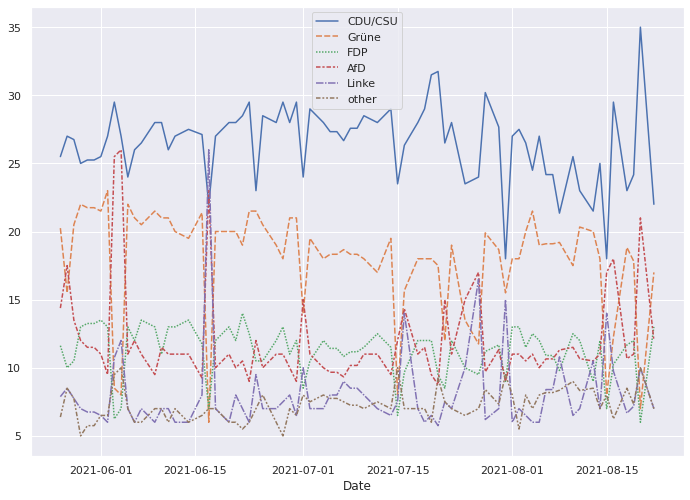

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_final[parties])
